# Libraries Imported

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reading .csv file

In [6]:
dataset = pd.read_csv('grid.csv')
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Constant Variables

In [7]:
X = dataset.drop(['stab', 'stabf'], axis=1)
y = dataset['stabf']

feature_names=['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']

# Feature Scaling via Standardization

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle =True, test_size=0.25, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVC

Classification Report:

              precision    recall  f1-score       support
stable         0.765145  0.697790  0.729917   5430.000000
unstable       0.836684  0.878474  0.857070   9570.000000
accuracy       0.813067  0.813067  0.813067      0.813067
macro avg      0.800915  0.788132  0.793494  15000.000000
weighted avg   0.810787  0.813067  0.811041  15000.000000


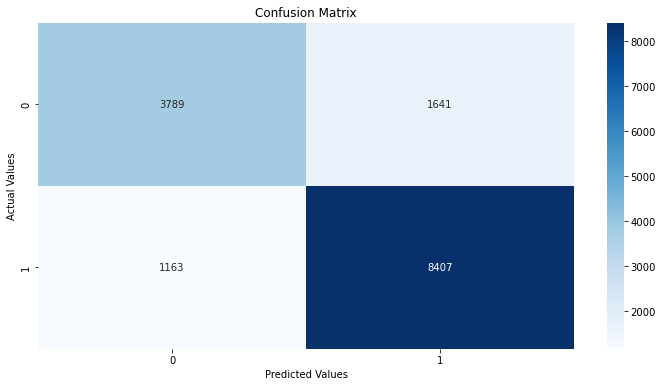

In [9]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred))
# print("Recall:", metrics.recall_score(y_test, y_pred))
# print("F1-score:", (2*metrics.precision_score(y_test, y_pred)*metrics.recall_score(y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred)))
# print("")

print("Classification Report:\n")
report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)

# SVC (GridSearchCV)

In [ ]:
clf = svm.SVC(random_state = 42)

param_grid = { 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2,3,4],
    'gamma': ['scale', 'auto'],
    'tol': [1e-2, 1e-3, 1e-4],
    'cache_size': [100,200,300],
    'coef0':[0,0.5,1,2]
}

CV_svc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_svc.fit(X_train, y_train)

# SVC Best Parameters

In [ ]:
CV_rfc.best_params_

# SVC Classifier w/ New Parameters

In [ ]:
clf = svm.SVC(random_state = 42, coef0 = 2, cache_size = 100, degree = 3, gamma = 'auto', kernel = 'poly', tol = 0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict = True)
cr = pd.DataFrame(report).transpose()
print(cr)